In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(w, b, x):
    if w.shape != x.shape:
        print("Wrong shapes: " + str(w.shape()) + ", " + str(x.shape()))
    return np.dot(w, x) + b

In [87]:
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [92]:
features = df[['LotArea', 'YearBuilt', 'OverallCond']].to_numpy()
feature_count = len(features[0])

#features are LotArea, YearBuilt, OverallCond
def cost(w, b):
    total_cost = 0
    
    for index, row in df.iterrows():
        total_cost += (f(w, b, features[index]) - row['SalePrice']) ** 2
    
    return total_cost / (2 * len(df.index))

In [93]:
cost(np.zeros(feature_count), 0)

19519633853.882877

In [100]:
def gradient_desc():
    w = np.zeros(feature_count)
    b = 0
    learning_rate = 0.000000001
    row_count = len(df.index)
    
    for i in range(0, 400):
        
        w_derivs = np.zeros(feature_count)
        b_deriv = 0
        
        for index, row in df.iterrows():
            base_deriv = f(w, b, features[index]) - row['SalePrice']
            
            deriv = features[index] * base_deriv
            w_derivs += deriv
            
            b_deriv += (f(w, b, features[index]) - row['SalePrice'])
            
        w_derivs = np.multiply(w_derivs, learning_rate / row_count)
        w = np.subtract(w, w_derivs)
        
        #w = w - learning_rate * (w_deriv / row_count)
        b = b - learning_rate * (b_deriv / row_count)
    
    return (w, b)

In [101]:
w,b = gradient_desc()

In [103]:
b

0.021346752155725297

In [104]:
w

array([ 5.88255092, 42.55983444,  0.11657645])

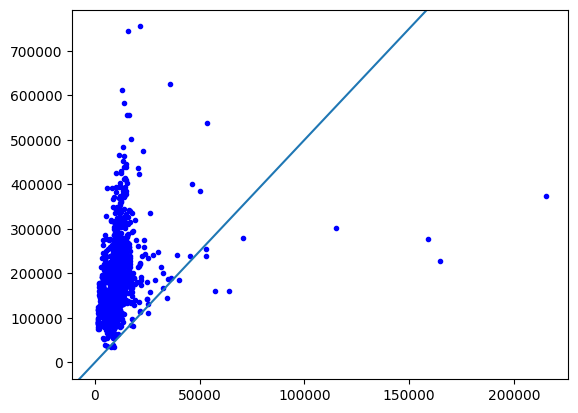

In [102]:
plt.plot(df['LotArea'], df['SalePrice'], 'b.')
plt.axline((0, b), slope=int(w[0]))

In [105]:
cost(w, b) / 100000

42126.83357462557